In [1]:
!pip install icrawler

In [2]:
from icrawler.builtin import GoogleImageCrawler
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import json

# List of crops
crops = ["wheat field", "paddy field", "jowar field", "maize field", "cotton field"]

# Base folder to store images
base_folder = "crop_images"
os.makedirs(base_folder, exist_ok=True)

# Download images for each crop
for crop in crops:
    crop_folder = os.path.join(base_folder, crop.replace(" ", "_"))
    os.makedirs(crop_folder, exist_ok=True)

    crawler = GoogleImageCrawler(storage={"root_dir": crop_folder})
    crawler.crawl(keyword=crop, max_num=800, filters={"type": "photo"})

print("All crop images downloaded.")

ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/465910852/photo/golden-wheat-field-and-sunny-day.jpg
ERROR:downloader:Response status code 401, file https://i.guim.co.uk/img/media/e07490f00ef85acf3c8eb33cca5e4c2dc0e7f464/0_116_2100_1260/master/2100.jpg
ERROR:downloader:Response status code 404, file https://t4.ftcdn.net/jpg
ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/181068280/photo/misty-sunrise-over-wheat-field-in-kansas.jpg
ERROR:downloader:Response status code 500, file https://plus.unsplash.com/premium_photo-1661823013705-d58ac4788630?fm=jpg
ERROR:downloader:Response status code 404, file https://as2.ftcdn.net/v2/jpg
ERROR:downloader:Response status code 400, file https://media.gettyimages.com/id/1126910159/photo/golden-wheat-fields.jpg
ERROR:downloader:Response status code 403, file https://preview.redd.it/i-found-the-guy-who-made-that-one-wheat-field-image-v0-1d7he7ecyefa1.png
ERROR:downloader:Response status 

All crop images downloaded.


In [3]:
# Zip and Download the Dataset
shutil.make_archive('crop_images', 'zip', base_folder)
files.download('crop_images.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# Prepare Data Generators for Training
img_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    base_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 244 images belonging to 5 classes.
Found 58 images belonging to 5 classes.


In [5]:
# Save class indices
class_indices = train_generator.class_indices
with open('class_indices.json', 'w') as f:
    json.dump(class_indices, f)

print(f"Class Indices: {class_indices}")

Class Indices: {'cotton_field': 0, 'jowar_field': 1, 'maize_field': 2, 'paddy_field': 3, 'wheat_field': 4}


In [6]:
# Define and Train CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(crops), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=val_generator, epochs=20)

# Save Trained Model
model.save('crop_classification_model.h5')
print("Model saved.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
5/8 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.2029 - loss: 1.7461

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.2115 - loss: 1.7305 - val_accuracy: 0.2241 - val_loss: 1.6282
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.1945 - loss: 1.6136 - val_accuracy: 0.4483 - val_loss: 1.5260
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.4072 - loss: 1.4762 - val_accuracy: 0.4828 - val_loss: 1.2083
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5016 - loss: 1.2806 - val_accuracy: 0.5690 - val_loss: 1.0765
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5706 - loss: 1.1825 - val_accuracy: 0.5517 - val_loss: 0.9812
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5466 - loss: 1.1307 - val_accuracy: 0.6034 - val_loss: 1.0135
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6532 - loss: 0.9385 - val_accuracy: 0.5517 - val_loss: 1.2295
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5762 - loss: 1.0870 - val_accuracy: 0.6207 - val_loss: 0.9556
Epoch 9/20
8/8 ━━━━

Model saved.


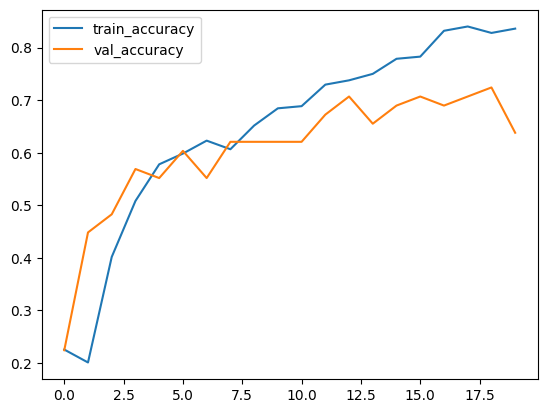

In [7]:
# Plot Training History
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


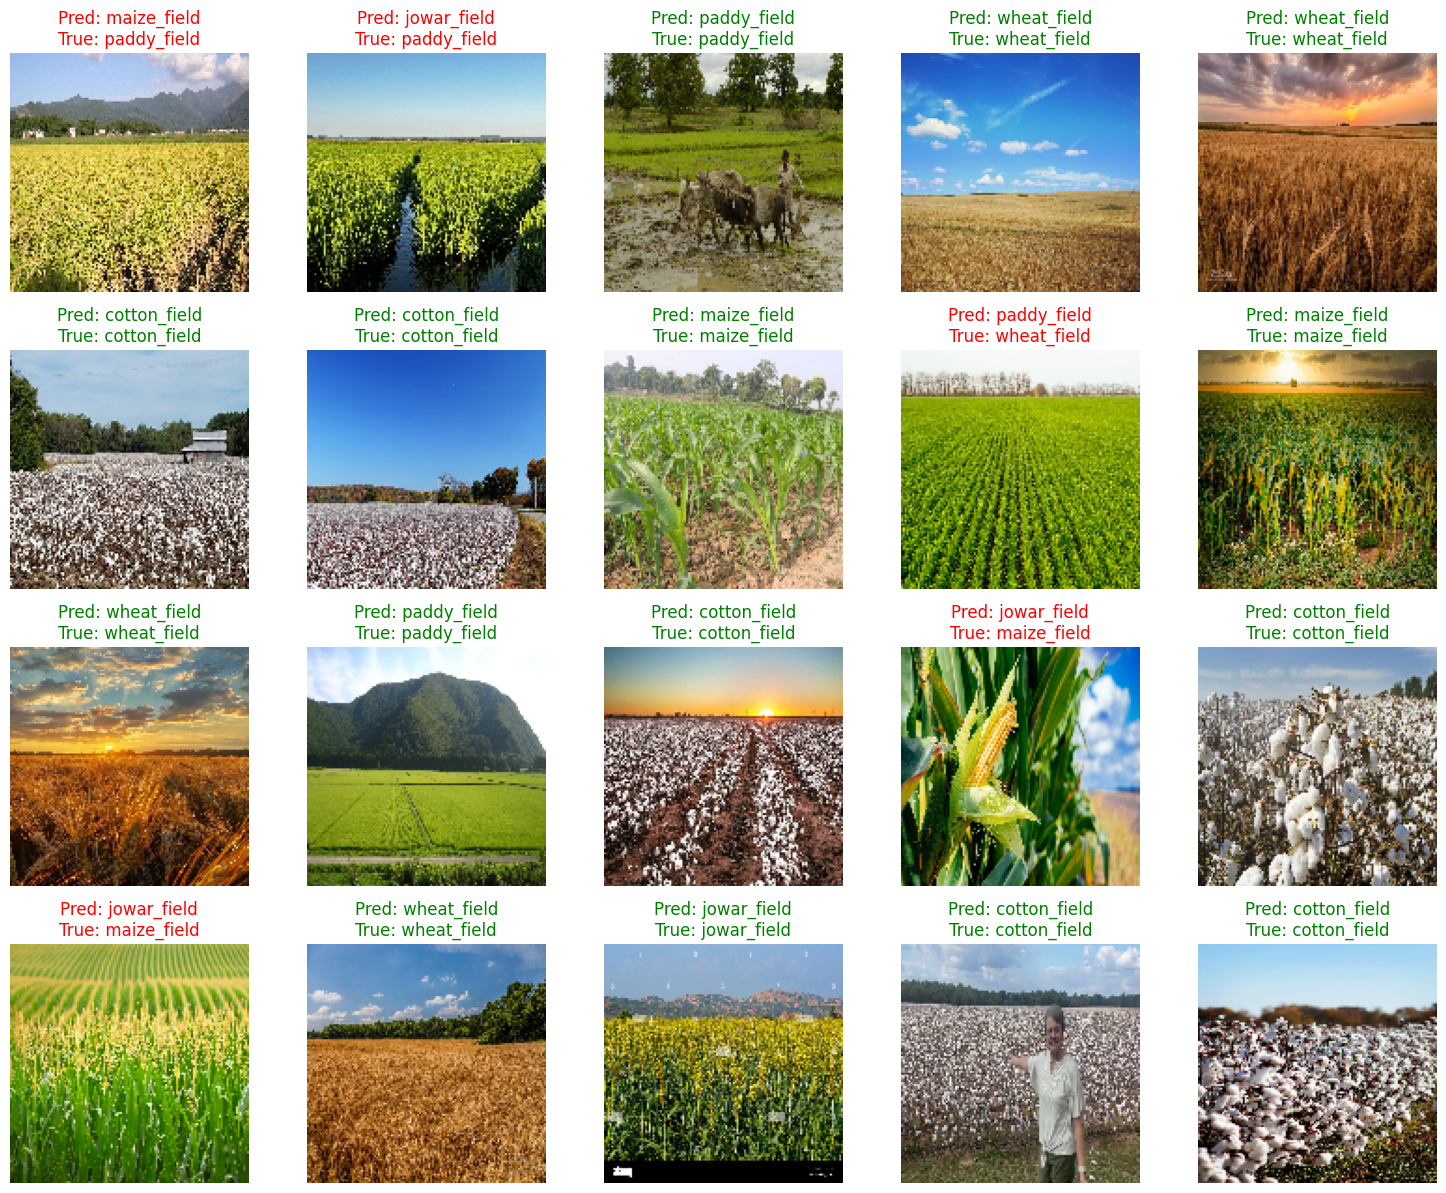

In [8]:
# Plot Predictions on Validation Set
def plot_predictions(generator, model, class_names, num_images=20):
    images, labels = next(generator)
    predictions = model.predict(images)

    plt.figure(figsize=(15, 15))

    for i in range(num_images):
        ax = plt.subplot(5, 5, i + 1)

        img = images[i]
        true_label = np.argmax(labels[i])
        predicted_label = np.argmax(predictions[i])

        true_class = class_names[true_label]
        predicted_class = class_names[predicted_label]

        plt.imshow(img)
        plt.axis("off")

        color = "green" if predicted_label == true_label else "red"
        plt.title(f"Pred: {predicted_class}\nTrue: {true_class}", color=color)

    plt.tight_layout()
    plt.show()
# Reverse class indices for plotting
class_names = {v: k for k, v in class_indices.items()}

plot_predictions(val_generator, model, class_names)

Saving 000005.jpg to 000005.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


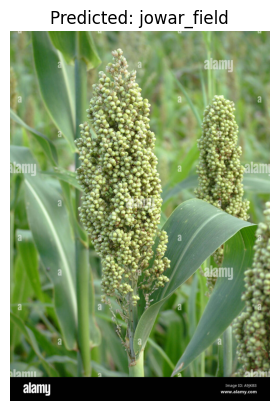

Predicted Crop: jowar_field


In [10]:
# User Image Upload and Prediction
def classify_uploaded_image():
    uploaded = files.upload()
    img_path = list(uploaded.keys())[0]

    img = Image.open(img_path).resize(img_size)
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    predicted_label = class_names[predicted_class]

    plt.imshow(Image.open(img_path))
    plt.title(f"Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()

    print(f"Predicted Crop: {predicted_label}")

# Call function to allow user to upload image and classify
classify_uploaded_image()